In [33]:
import requests
import json
import datetime
import pandas as pd
import pytz
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
res = requests.get("https://docs.openaq.org/v2/measurements?date_from=2021-08-11T00%3A00%3A00%2B00%3A00&date_to=2021-08-18T14%3A34%3A00%2B00%3A00&limit=12000&page=1&offset=0&sort=desc&location_id=71229&order_by=datetime")
content = res.content
data = json.loads(content)
results = data["results"]

In [35]:
df_ref = pd.DataFrame.from_dict(results)
df_ref['date'] = df_ref['date'].apply(lambda x: x.get('local'))
df_ref.date = pd.to_datetime(df_ref.date)
df_ref2 = df_ref[df_ref['parameter']=='um025']
df_ref3 = df_ref2.resample('H', on='date').median()

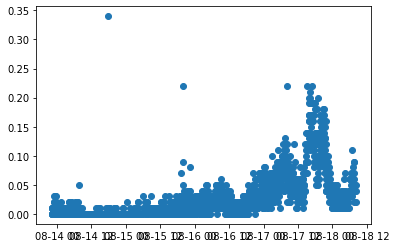

In [21]:
plt.scatter(df_ref2['date'], df_ref2['value'])

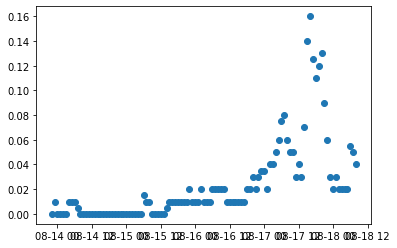

In [22]:
plt.scatter(df_ref3.index, df_ref3['value'])

In [23]:
r = requests.get("https://docs.openaq.org/v2/measurements?date_from=2021-08-11T00%3A00%3A00%2B00%3A00&date_to=2021-08-18T14%3A34%3A00%2B00%3A00&limit=10000&page=1&offset=0&sort=desc&radius=1000&location_id=62467&order_by=datetime")
c = r.content
low_cost_data = json.loads(c)
low_cost_results = low_cost_data["results"]


In [27]:
df_low_cost = pd.DataFrame.from_dict(low_cost_results)
df_low_cost['date'] = df_low_cost['date'].apply(lambda x: x.get('local'))
df_low_cost.date = pd.to_datetime(df_low_cost.date)
df_low_cost2 = df_low_cost[df_low_cost['parameter']=='um025']
df_low_cost3 = df_low_cost2.resample('H', on='date').median()

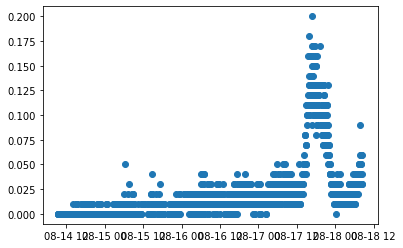

In [36]:
plt.scatter(df_low_cost2['date'], df_low_cost2['value'])

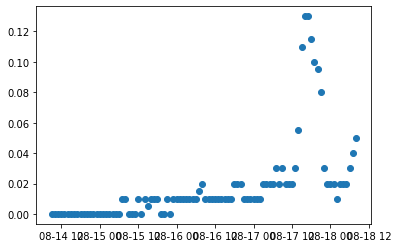

In [30]:
plt.scatter(df_low_cost3.index, df_low_cost3['value'])

In [28]:
correlation = df_ref3['value'].corr( df_low_cost3['value'])

In [29]:
correlation

0.9313165359318188

In [40]:
df1 = df_ref3.head(-11)

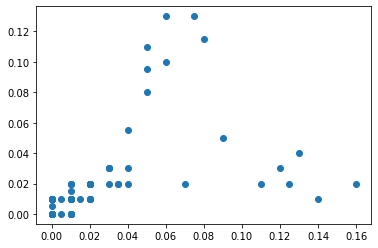

In [42]:
plt.scatter(df1['value'], df_low_cost3['value'])